In [1]:
%matplotlib inline
%run helper_functions.py

import pandas as pd
import seaborn as sns
import numpy as np
import sklearn
sns.set_style("whitegrid")
#pylab.rcParams['figure.figsize'] = 16, 12


# Loading a dataset with labeled text for 20 newsgroups

In [2]:
from sklearn.datasets import fetch_20newsgroups
news_data = fetch_20newsgroups()

In [3]:
X = news_data.data
y = news_data.target

In [4]:
y_labels = [news_data.target_names[x] for x in y]
print ("Total texts: ", len(y_labels))
pd.Series(y_labels).value_counts()

Total texts:  11314


rec.sport.hockey            600
soc.religion.christian      599
rec.motorcycles             598
rec.sport.baseball          597
sci.crypt                   595
sci.med                     594
rec.autos                   594
sci.space                   593
comp.windows.x              593
comp.os.ms-windows.misc     591
sci.electronics             591
comp.sys.ibm.pc.hardware    590
misc.forsale                585
comp.graphics               584
comp.sys.mac.hardware       578
talk.politics.mideast       564
talk.politics.guns          546
alt.atheism                 480
talk.politics.misc          465
talk.religion.misc          377
Name: count, dtype: int64

# Building a naive bayes classifier
Notice that we used a pipeline to combine TF-IDF vectorisation and the model creation

                          precision    recall  f1-score   support

             alt.atheism       0.89      0.83      0.86       480
           comp.graphics       0.79      0.81      0.80       584
 comp.os.ms-windows.misc       0.79      0.81      0.80       591
comp.sys.ibm.pc.hardware       0.71      0.82      0.76       590
   comp.sys.mac.hardware       0.87      0.83      0.85       578
          comp.windows.x       0.85      0.87      0.86       593
            misc.forsale       0.83      0.82      0.82       585
               rec.autos       0.88      0.89      0.88       594
         rec.motorcycles       0.91      0.95      0.93       598
      rec.sport.baseball       0.93      0.94      0.94       597
        rec.sport.hockey       0.91      0.97      0.94       600
               sci.crypt       0.93      0.95      0.94       595
         sci.electronics       0.87      0.74      0.80       591
                 sci.med       0.96      0.90      0.93       594
         

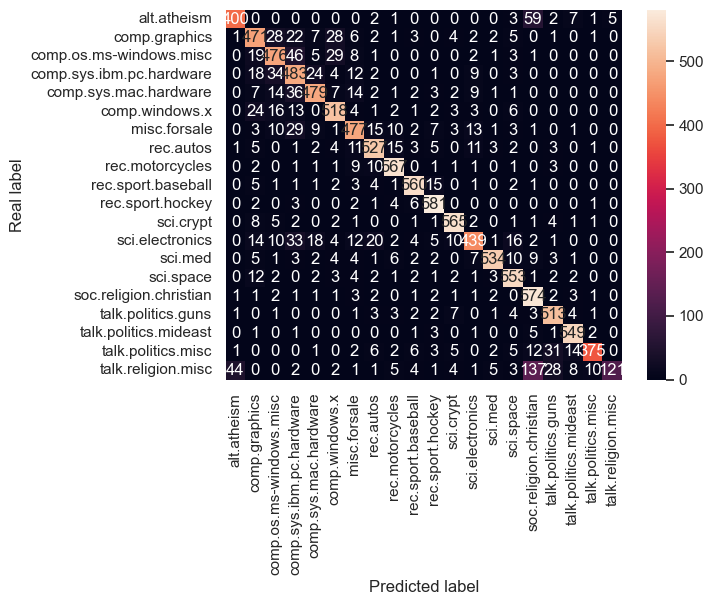

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_predict

model = make_pipeline(TfidfVectorizer(stop_words='english', min_df=10, max_df=0.5), MultinomialNB())
y_pred = cross_val_predict(model, X, y, cv=3)

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
print (classification_report(y, y_pred, target_names = news_data.target_names))
print ("Accuracy: ", accuracy_score(y, y_pred))
cm =  confusion_matrix(y_pred=y_pred, y_true=y)
plot_confusion_matrix(cm, news_data.target_names)

# Example predicting new text!

In [6]:
## predict function for any string
def predict_category(s, target_names, model):
    pred = model.predict([s])
    return target_names[pred[0]]

model.fit(X, y)

,steps,"[('tfidfvectorizer', ...), ('multinomialnb', ...)]"
,transform_input,None
,memory,None
,verbose,False
,input,'content'
,encoding,'utf-8'
,decode_error,'strict'
,strip_accents,None
,lowercase,True
,preprocessor,None
,tokenizer,None


In [7]:

print (predict_category('sending a payload to ISS', news_data.target_names, model))
print (predict_category('I do not believe in god.', news_data.target_names, model))
print (predict_category('Did the patien have an injection?', news_data.target_names, model))
print (predict_category('Moses', news_data.target_names, model))

sci.space
soc.religion.christian
sci.med
soc.religion.christian


# Most important words per class

In [8]:
def most_informative_words( pipelineModel, class_labels, n=20):
    vectorizer = pipelineModel.named_steps['tfidfvectorizer']
    multinomialnb = pipelineModel.named_steps['multinomialnb']
    
    feature_names = vectorizer.get_feature_names_out()
    
    for class_index in range(len(class_labels)):
        print("****************")
        print (class_labels[class_index])
        topn = sorted(zip(multinomialnb.feature_log_prob_[class_index], feature_names))[-n:]
        for coef, feat in reversed(topn):
            print ("%3.2f %s"%(coef, feat))
        

most_informative_words(model, news_data.target_names)

****************
alt.atheism
-6.57 keith
-6.67 god
-6.93 caltech
-7.03 atheists
-7.10 livesey
-7.14 atheism
-7.14 com
-7.19 people
-7.19 sgi
-7.29 morality
-7.32 islam
-7.38 don
-7.42 islamic
-7.43 solntze
-7.45 wpd
-7.48 think
-7.49 article
-7.49 religion
-7.51 schneider
-7.51 moral
****************
comp.graphics
-6.46 graphics
-7.12 image
-7.22 3d
-7.24 files
-7.30 university
-7.31 com
-7.36 thanks
-7.40 polygon
-7.42 posting
-7.43 file
-7.45 program
-7.47 host
-7.48 nntp
-7.54 tiff
-7.54 images
-7.55 uk
-7.55 ac
-7.55 help
-7.57 package
-7.58 need
****************
comp.os.ms-windows.misc
-5.75 windows
-6.80 file
-6.86 dos
-7.06 files
-7.15 driver
-7.20 drivers
-7.24 com
-7.25 ms
-7.30 card
-7.33 university
-7.33 use
-7.34 mouse
-7.42 win
-7.43 program
-7.45 thanks
-7.45 ax
-7.45 using
-7.47 nt
-7.50 problem
-7.53 access
****************
comp.sys.ibm.pc.hardware
-6.54 scsi
-6.58 drive
-6.82 card
-6.85 ide
-6.93 bus
-6.98 com
-6.99 controller
-7.15 pc
-7.27 disk
-7.34 thanks
-7.36 isa

# How about KNN? 

                          precision    recall  f1-score   support

             alt.atheism       0.76      0.86      0.81       480
           comp.graphics       0.56      0.67      0.61       584
 comp.os.ms-windows.misc       0.61      0.71      0.65       591
comp.sys.ibm.pc.hardware       0.56      0.61      0.58       590
   comp.sys.mac.hardware       0.63      0.62      0.62       578
          comp.windows.x       0.75      0.71      0.73       593
            misc.forsale       0.53      0.51      0.52       585
               rec.autos       0.73      0.71      0.72       594
         rec.motorcycles       0.79      0.80      0.80       598
      rec.sport.baseball       0.79      0.79      0.79       597
        rec.sport.hockey       0.81      0.89      0.84       600
               sci.crypt       0.87      0.89      0.88       595
         sci.electronics       0.73      0.55      0.63       591
                 sci.med       0.85      0.75      0.80       594
         

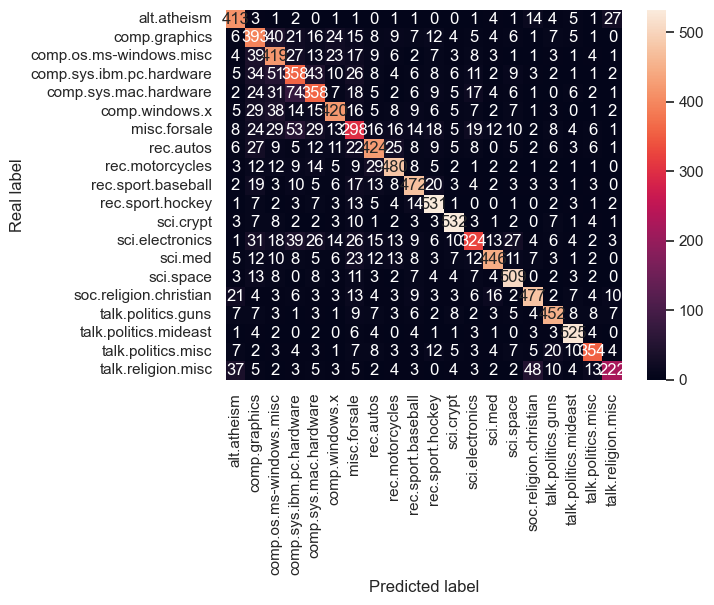

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_predict

model = make_pipeline(TfidfVectorizer(stop_words='english', min_df=10, max_df=0.5), KNeighborsClassifier(n_neighbors=10))
y_pred = cross_val_predict(model, X, y, cv=3)

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
print (classification_report(y, y_pred, target_names = news_data.target_names))
print ("Accuracy: ", accuracy_score(y, y_pred))
cm =  confusion_matrix(y_pred=y_pred, y_true=y)
plot_confusion_matrix(cm, news_data.target_names)

# Using the TF-IDF vectors and nearest neighbours to find similar text

In [10]:
from sklearn.neighbors import NearestNeighbors

tfidf_vectorizer = TfidfVectorizer(stop_words='english', min_df=10, max_df=0.5).fit(X)
tfidf_X = tfidf_vectorizer.transform(X)

model = NearestNeighbors()
model.fit(tfidf_X)

,n_neighbors,5
,radius,1.0
,algorithm,'auto'
,leaf_size,30
,metric,'minkowski'
,p,2
,metric_params,None
,n_jobs,None


In [11]:
#text = "I am not sure the OS is working, maybe i need to format my PC"
#text = "Which CPU do you think is faster ? I want to play a lot of games"
text = "People believe there is life on Mars"

new_x = tfidf_vectorizer.transform([text])
distance, neighbours = model.kneighbors(new_x, n_neighbors=5)

for neighbour in neighbours[0]:
    print (X[neighbour])

From: henry@zoo.toronto.edu (Henry Spencer)
Subject: Re: Life on Mars???
Organization: U of Toronto Zoology
Lines: 24

In article <1993Apr20.120311.1@pa881a.inland.com> schiewer@pa881a.inland.com (Don Schiewer) writes:
>What is the deal with life on Mars?  I save the "face" and heard 
>associated theories. (which sound thin to me)

The "face" is an accident of light and shadow.  There are many "faces" in
landforms on Earth; none is artificial (well, excluding Mount Rushmore and
the like...).  There is also a smiley face on Mars, and a Kermit The Frog.

The question of life in a more mundane sense -- bacteria or the like -- is
not quite closed, although the odds are against it, and the most that the
more orthodox exobiologists are hoping for now is fossils.

There are currently no particular plans to do any further searches for life.

>Are we going back to Mars to look at this face agian?

Mars Observer, currently approaching Mars, will probably try to get a better
image or two of the "